<a href="https://colab.research.google.com/github/AshSama12/Anomaly-detection-in-wearing-PPE/blob/master/Human_Detection_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pip install ultralytics
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.1/910.1 kB 36.7 MB/s eta 0:00:00


In [5]:
import zipfile

dataset_path = '/content/drive/MyDrive/research2025/human detection new 2.v5i.yolov8-obb.zip'

with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall('/content/human_detection_dataset')

# Verify extraction
!ls /content/human_detection_dataset


data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [6]:
from ultralytics import YOLO

# Initialize the YOLO model
model = YOLO('yolov8n.pt')

# Train the model
model.train(
    data='/content/human_detection_dataset/data.yaml',
    epochs=50,
    imgsz=640,
    batch=16,
    name='human_detection',
    project='/content/training_results'
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 249MB/s]


Ultralytics 8.3.62 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/human_detection_dataset/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/training_results, name=human_detection, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=Fals

100%|██████████| 755k/755k [00:00<00:00, 77.6MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 350MB/s]


AMP: checks passed ✅


train: Scanning /content/human_detection_dataset/train/labels... 1326 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1326/1326 [00:00<00:00, 1817.68it/s]

train: New cache created: /content/human_detection_dataset/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.0 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/human_detection_dataset/valid/labels... 126 images, 0 backgrounds, 0 corrupt: 100%|██████████| 126/126 [00:00<00:00, 1277.47it/s]


val: New cache created: /content/human_detection_dataset/valid/labels.cache
Plotting labels to /content/training_results/human_detection/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/training_results/human_detection
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.27G      1.742      2.094      1.659         58        640: 100%|██████████| 83/83 [00:33<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.17s/it]

                   all        126        288      0.413      0.448      0.354      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.17G      1.827      2.002      1.808         75        640: 100%|██████████| 83/83 [00:30<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.42it/s]

                   all        126        288      0.526      0.424      0.427      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.18G      1.903      2.007      1.857         68        640: 100%|██████████| 83/83 [00:31<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.53it/s]

                   all        126        288       0.22      0.354      0.176     0.0563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.24G      1.929      2.003      1.871         53        640: 100%|██████████| 83/83 [00:33<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.57it/s]

                   all        126        288      0.464      0.406      0.422      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.19G      1.882      1.903      1.867         75        640: 100%|██████████| 83/83 [00:33<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.53it/s]

                   all        126        288       0.63      0.533      0.576      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.17G      1.864      1.871      1.814         58        640: 100%|██████████| 83/83 [00:31<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]

                   all        126        288      0.661      0.573      0.578      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.16G      1.814      1.791      1.781         86        640: 100%|██████████| 83/83 [00:29<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.47it/s]

                   all        126        288      0.686      0.569      0.661      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.27G      1.793      1.786      1.789         69        640: 100%|██████████| 83/83 [00:29<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.31it/s]

                   all        126        288      0.708       0.59      0.664      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.18G      1.779      1.711      1.766         61        640: 100%|██████████| 83/83 [00:31<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.57it/s]

                   all        126        288       0.72       0.59      0.633      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.17G      1.761      1.708      1.758         64        640: 100%|██████████| 83/83 [00:32<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.60it/s]

                   all        126        288      0.592      0.642      0.658      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.16G       1.73      1.659      1.732         54        640: 100%|██████████| 83/83 [00:33<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.50it/s]

                   all        126        288      0.717      0.719      0.767       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.26G       1.69      1.633      1.708         59        640: 100%|██████████| 83/83 [00:32<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.47it/s]

                   all        126        288      0.798      0.722      0.789      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.17G      1.703      1.618      1.737         77        640: 100%|██████████| 83/83 [00:29<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]

                   all        126        288       0.67      0.594      0.599      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.19G      1.676      1.611      1.712         55        640: 100%|██████████| 83/83 [00:30<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.34it/s]

                   all        126        288      0.733      0.618      0.709       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.17G      1.655      1.574      1.684         41        640: 100%|██████████| 83/83 [00:32<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.73it/s]

                   all        126        288      0.684      0.715      0.719      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.24G      1.665      1.518      1.679         65        640: 100%|██████████| 83/83 [00:32<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.72it/s]

                   all        126        288        0.7      0.639      0.744      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.17G      1.665      1.521      1.664         50        640: 100%|██████████| 83/83 [00:32<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.54it/s]

                   all        126        288      0.788      0.722      0.803      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.18G      1.621      1.465      1.635         85        640: 100%|██████████| 83/83 [00:30<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.40it/s]

                   all        126        288      0.833       0.75      0.824      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.16G      1.601      1.441      1.627         58        640: 100%|██████████| 83/83 [00:28<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.53it/s]

                   all        126        288      0.754      0.677       0.73       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.24G      1.612      1.427      1.631         56        640: 100%|██████████| 83/83 [00:31<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.49it/s]

                   all        126        288      0.743      0.698      0.743       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.16G      1.579      1.409      1.606         58        640: 100%|██████████| 83/83 [00:32<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.54it/s]

                   all        126        288      0.822      0.739      0.827      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.18G      1.593      1.389      1.599         73        640: 100%|██████████| 83/83 [00:33<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]

                   all        126        288      0.804      0.741      0.806      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.17G      1.561       1.37      1.596         79        640: 100%|██████████| 83/83 [00:31<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.47it/s]

                   all        126        288       0.79      0.731      0.775      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.24G      1.559      1.377      1.601         71        640: 100%|██████████| 83/83 [00:29<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.42it/s]

                   all        126        288      0.831      0.757      0.819      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.18G      1.531      1.335      1.571         58        640: 100%|██████████| 83/83 [00:30<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.57it/s]

                   all        126        288      0.787      0.758      0.802      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.19G       1.55      1.332       1.57         72        640: 100%|██████████| 83/83 [00:33<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.52it/s]

                   all        126        288      0.784      0.757      0.823      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.18G      1.511      1.285      1.548         47        640: 100%|██████████| 83/83 [00:33<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.55it/s]

                   all        126        288      0.818      0.726      0.804      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.27G      1.512       1.27      1.559         71        640: 100%|██████████| 83/83 [00:33<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.72it/s]

                   all        126        288      0.826      0.795      0.849      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.18G       1.49      1.237       1.54         75        640: 100%|██████████| 83/83 [00:31<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.41it/s]

                   all        126        288      0.845      0.753      0.821      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.15G      1.488      1.255      1.549         55        640: 100%|██████████| 83/83 [00:30<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.60it/s]

                   all        126        288       0.88      0.712      0.834      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.18G      1.472      1.218      1.519         46        640: 100%|██████████| 83/83 [00:31<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.50it/s]

                   all        126        288       0.87      0.767      0.841      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.24G      1.476      1.213      1.537         50        640: 100%|██████████| 83/83 [00:33<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]

                   all        126        288      0.839      0.722      0.809        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.18G      1.448      1.192      1.517         55        640: 100%|██████████| 83/83 [00:33<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.48it/s]

                   all        126        288      0.852      0.785      0.829      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.16G      1.437      1.174      1.508         53        640: 100%|██████████| 83/83 [00:32<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.58it/s]

                   all        126        288      0.894      0.753      0.853      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       2.2G      1.416      1.172      1.495         69        640: 100%|██████████| 83/83 [00:30<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.32it/s]

                   all        126        288       0.77      0.799      0.818      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.24G      1.413      1.131      1.484         69        640: 100%|██████████| 83/83 [00:29<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.89it/s]

                   all        126        288      0.865      0.777      0.847      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.18G      1.387      1.126      1.471         65        640: 100%|██████████| 83/83 [00:32<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.46it/s]

                   all        126        288      0.871      0.785      0.859      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.18G      1.392      1.115      1.476         57        640: 100%|██████████| 83/83 [00:33<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.61it/s]

                   all        126        288      0.858      0.775      0.867      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.17G      1.366      1.097      1.458         72        640: 100%|██████████| 83/83 [00:33<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.56it/s]

                   all        126        288      0.854       0.79      0.861      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.26G      1.347      1.092      1.452         54        640: 100%|██████████| 83/83 [00:31<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.42it/s]

                   all        126        288      0.821      0.813      0.858      0.431


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.23G      1.291     0.8614      1.427         37        640: 100%|██████████| 83/83 [00:27<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.82it/s]

                   all        126        288      0.765      0.837      0.843      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.14G      1.257     0.8139      1.403         40        640: 100%|██████████| 83/83 [00:29<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.99it/s]

                   all        126        288      0.873      0.788       0.85      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.14G      1.249     0.7939      1.397         34        640: 100%|██████████| 83/83 [00:27<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.57it/s]

                   all        126        288      0.873      0.785      0.866      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.22G      1.238     0.7892       1.39         27        640: 100%|██████████| 83/83 [00:26<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.84it/s]

                   all        126        288      0.848      0.792      0.865      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.15G      1.197      0.749      1.366         25        640: 100%|██████████| 83/83 [00:30<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.57it/s]

                   all        126        288      0.836      0.781       0.86      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.14G       1.21     0.7476      1.367         34        640: 100%|██████████| 83/83 [00:26<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.64it/s]

                   all        126        288      0.881      0.797      0.878      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.13G      1.166     0.7251      1.336         26        640: 100%|██████████| 83/83 [00:28<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.83it/s]

                   all        126        288      0.846      0.785      0.857      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.22G      1.167     0.7206      1.339         34        640: 100%|██████████| 83/83 [00:28<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.36it/s]

                   all        126        288       0.81      0.817      0.861      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.15G      1.126     0.7058      1.321         31        640: 100%|██████████| 83/83 [00:26<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.62it/s]

                   all        126        288      0.809      0.826      0.862       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.14G      1.121     0.6784      1.303         26        640: 100%|██████████| 83/83 [00:31<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.78it/s]

                   all        126        288      0.871      0.771      0.866      0.453



50 epochs completed in 0.474 hours.
Optimizer stripped from /content/training_results/human_detection/weights/last.pt, 6.2MB
Optimizer stripped from /content/training_results/human_detection/weights/best.pt, 6.2MB

Validating /content/training_results/human_detection/weights/best.pt...
Ultralytics 8.3.62 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.02it/s]


                   all        126        288       0.88      0.799      0.878      0.465
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 11.8ms postprocess per image
Results saved to /content/training_results/human_detection


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c44f125d490>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

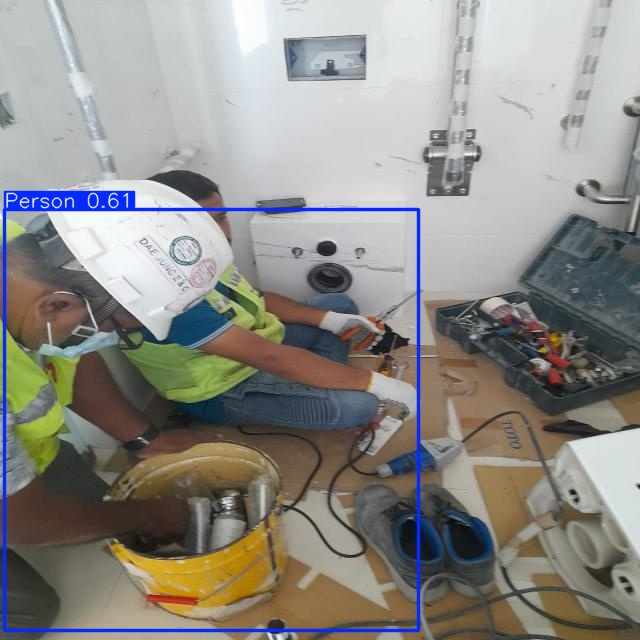

In [10]:
# Display results
from IPython.display import Image, display

# Specify the correct path to the output image
output_image_path = '/content/runs/detect/predict2/WhatsApp-Image-2024-03-19-at-10-00-39-PM_jpeg.rf.9bc30d01b1149cc6ea1d656283e32872.jpg'

# Display the image
display(Image(filename=output_image_path))


In [11]:
# Evaluate model performance
metrics = trained_model.val(
    data='/content/human_detection_dataset/data.yaml',
    conf=0.5,
    save_json=True
)

# Print evaluation metrics
print(metrics)


Ultralytics 8.3.62 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/human_detection_dataset/valid/labels.cache... 126 images, 0 backgrounds, 0 corrupt: 100%|██████████| 126/126 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.85it/s]


                   all        126        288       0.88      0.792      0.861      0.507
Speed: 0.6ms preprocess, 7.9ms inference, 0.0ms loss, 4.3ms postprocess per image
Saving runs/detect/val/predictions.json...
Results saved to runs/detect/val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c44f1c20450>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.0

Upload an image for human detection:


Saving 462691155_122113745564520283_6533444783995518955_n.jpg to 462691155_122113745564520283_6533444783995518955_n (1).jpg

image 1/1 /content/462691155_122113745564520283_6533444783995518955_n (1).jpg: 640x544 6 Persons, 9.3ms
Speed: 4.5ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 544)
Results saved to runs/detect/predict4
Detection result saved at: runs/detect/predict4/462691155_122113745564520283_6533444783995518955_n (1).jpg


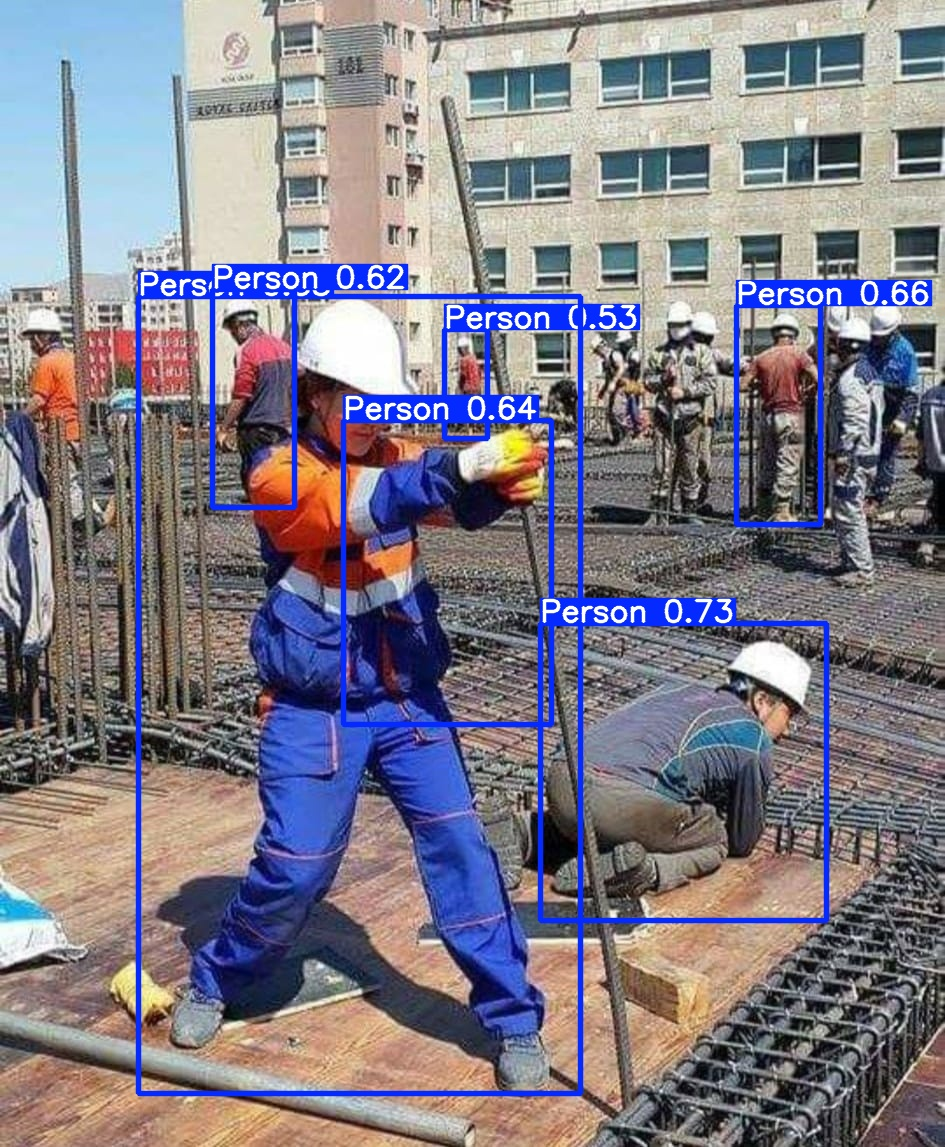

In [13]:
from google.colab import files
from ultralytics import YOLO
from IPython.display import Image, display

# Upload an image
print("Upload an image for human detection:")
uploaded = files.upload()

# Get the uploaded image file name
image_path = list(uploaded.keys())[0]

# Load the trained YOLOv8 model
trained_model = YOLO('/content/training_results/human_detection/weights/best.pt')

# Perform human detection
results = trained_model(image_path, conf=0.5, save=True)

# Retrieve the output directory
output_dir = trained_model.predictor.save_dir
output_image_path = f"{output_dir}/{image_path.split('/')[-1]}"

# Display the detection result
print(f"Detection result saved at: {output_image_path}")
display(Image(filename=output_image_path))
